# VAD Lexicon (Valence-Arousal-Dominance)
- 데이터셋 출처
> https://link.springer.com/article/10.3758/s13428-012-0314-x

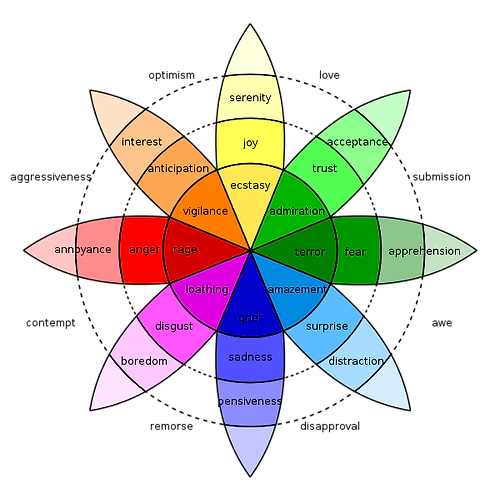

- 8가지 기본 감정 (가장 큰 범주)
1. Joy (기쁨)
2. Trust (신뢰)
3. Fear (공포)
4. Surprise (놀람)
5. Sadness (슬픔)
6. Disgust (혐오)
7. Anger (분노)
8. Anticipation (기대)

- 인사이드 아웃2 감정 
1. Joy (기쁨이)
2. Sadness (슬픔이)
3. Anger (버럭이)
4. Disgust (까칠이)
5. Fear (소심이)
6. Anxiety (불안이) -> Fear의 외곽에 해당
7. Envy (부럽이) -> 복합 감정(슬픔+분노) (기본 감정엔 없음)
8. Embarrassment (당황이) -> 복합 감정 (놀람+슬픔)
9. Ennui (따분이) -> Disgust의 외곽에 해당 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# 데이터 로드
df = pd.read_csv(r'C:\Users\wooll\OneDrive\문서\GitHub\-\dataset\BRM-emot-submit.csv', index_col=0)
df.head(3)

,Word,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,D.Mean.Sum,D.SD.Sum,D.Rat.Sum,...,A.Rat.L,A.Mean.H,A.SD.H,A.Rat.H,D.Mean.L,D.SD.L,D.Rat.L,D.Mean.H,D.SD.H,D.Rat.H
1,aardvark,6.26,2.21,19,2.41,1.40,22,4.27,1.75,15,...,11,2.55,1.29,11,4.12,1.64,8,4.43,1.99,7
2,abalone,5.30,1.59,20,2.65,1.90,20,4.95,1.79,22,...,12,2.38,1.92,8,5.55,2.21,11,4.36,1.03,11
3,abandon,2.84,1.54,19,3.73,2.43,22,3.32,2.50,22,...,11,3.82,2.14,11,2.77,2.09,13,4.11,2.93,9


In [6]:
df.columns

Index(['Word', 'V.Mean.Sum', 'V.SD.Sum', 'V.Rat.Sum', 'A.Mean.Sum', 'A.SD.Sum',
       'A.Rat.Sum', 'D.Mean.Sum', 'D.SD.Sum', 'D.Rat.Sum', 'V.Mean.M',
       'V.SD.M', 'V.Rat.M', 'V.Mean.F', 'V.SD.F', 'V.Rat.F', 'A.Mean.M',
       'A.SD.M', 'A.Rat.M', 'A.Mean.F', 'A.SD.F', 'A.Rat.F', 'D.Mean.M',
       'D.SD.M', 'D.Rat.M', 'D.Mean.F', 'D.SD.F', 'D.Rat.F', 'V.Mean.Y',
       'V.SD.Y', 'V.Rat.Y', 'V.Mean.O', 'V.SD.O', 'V.Rat.O', 'A.Mean.Y',
       'A.SD.Y', 'A.Rat.Y', 'A.Mean.O', 'A.SD.O', 'A.Rat.O', 'D.Mean.Y',
       'D.SD.Y', 'D.Rat.Y', 'D.Mean.O', 'D.SD.O', 'D.Rat.O', 'V.Mean.L',
       'V.SD.L', 'V.Rat.L', 'V.Mean.H', 'V.SD.H', 'V.Rat.H', 'A.Mean.L',
       'A.SD.L', 'A.Rat.L', 'A.Mean.H', 'A.SD.H', 'A.Rat.H', 'D.Mean.L',
       'D.SD.L', 'D.Rat.L', 'D.Mean.H', 'D.SD.H', 'D.Rat.H'],
      dtype='object')

| 컬럼 패턴                                   | 설명                                                               |
|--------------------------------------------|--------------------------------------------------------------------|
| `Word`                                     | 단어(lemma)                                                        |
| `{V,A,D}.Mean.Sum`                         | 전체집단(combined sample)에서의 해당 차원 평균 점수 (1–9 척도)     |
| `{V,A,D}.SD.Sum`                           | 전체집단 해당 차원 평가의 표준편차                                  |
| `{V,A,D}.Rat.Sum`                          | 전체집단 해당 차원에 참여한 평가자(응답자) 수                       |
| `{V,A,D}.Mean.M` / `.SD.M` / `.Rat.M`      | 남성(Male) 참가자만 따로 뽑았을 때의 평균·표준편차·평가자 수      |
| `{V,A,D}.Mean.F` / `.SD.F` / `.Rat.F`      | 여성(Female) 참가자만 따로 뽑았을 때의 평균·표준편차·평가자 수    |
| `{V,A,D}.Mean.Y` / `.SD.Y` / `.Rat.Y`      | 젊은(Young) 참가자(연령 하위 집단)의 평균·표준편차·평가자 수       |
| `{V,A,D}.Mean.O` / `.SD.O` / `.Rat.O`      | 나이든(Old) 참가자(연령 상위 집단)의 평균·표준편차·평가자 수       |
| `{V,A,D}.Mean.L` / `.SD.L` / `.Rat.L`      | 1차 실험(Study 1) 참가자의 평균·표준편차·평가자 수                |
| `{V,A,D}.Mean.H` / `.SD.H` / `.Rat.H`      | 2차 실험(Study 2) 참가자의 평균·표준편차·평가자 수                |

In [19]:
# 전체 집단 V-A-D 평균만 추출
df = df[["Word","V.Mean.Sum","A.Mean.Sum","D.Mean.Sum"]]

# 컬럼명 보기 편하게 변경
df.columns = ["Word","Valence","Arousal","Dominance"]

df = df.set_index("Word")

In [13]:
df.head()

,Valence,Arousal,Dominance
Word,,,
aardvark,6.26,2.41,4.27
abalone,5.30,2.65,4.95
abandon,2.84,3.73,3.32
abandonment,2.63,4.95,2.64
abbey,5.85,2.20,5.00


# 1. Plutchick의 8가지 기본 감정으로 단어 집합 분류

In [17]:
# Plutchik 8 기본 감정 전형어 좌표
plutchik_labels = [
    "Joy", "Trust", "Fear", "Surprise",
    "Sadness", "Disgust", "Anger", "Anticipation"
]

In [20]:
# 분류 함수
def categorize_emotion(row, center_val=5.0, center_ar=5.0):
    """
    Plutchik의 8개 감정으로 분류.
    - (center_val, center_ar)를 중점(Neutral)으로 보고,
      (Valence, Arousal) 벡터의 각도를 계산한 뒤
      45° 간격의 섹터에 따라 라벨링.
    """
    v, a = row.Valence, row.Arousal
    # 중심 이동 후 각도 계산 (0° 축은 +X 방향)
    theta = np.degrees(np.arctan2(a - center_ar, v - center_val)) % 360
    # 45°씩 8등분하여 인덱스 추출
    idx = int((theta + 22.5) // 45) % 8
    return plutchik_labels[idx]

# 적용 예시
df["PlutchikEmotion"] = df.apply(categorize_emotion, axis=1)

In [22]:
# 감정별 개수 집계
counts = df["PlutchikEmotion"].value_counts().reindex(plutchik_labels)

In [30]:
counts

PlutchikEmotion
Joy             1519
Trust            456
Fear             176
Surprise         602
Sadness         1826
Disgust         1966
Anger           3832
Anticipation    3538
Name: count, dtype: int64

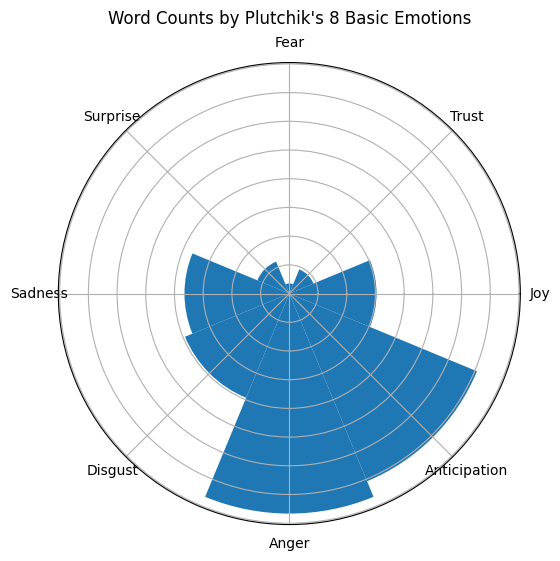

In [25]:
# 시각화 
angles = np.linspace(0, 2*np.pi, len(plutchik_labels), endpoint=False)
width = 2*np.pi / len(plutchik_labels)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
bars = ax.bar(angles, counts, width=width, bottom=0.0)

# 라벨링
ax.set_xticks(angles)
ax.set_xticklabels(plutchik_labels)
ax.set_yticklabels([])  # 축 눈금 숨기기
ax.set_title("Word Counts by Plutchik's 8 Basic Emotions", va='bottom')

plt.show()

# 2. 인사이드 아웃 2 기반 (Joy, Sadness, Anger, Disgust, Fear, Anxiety, Envy, Embarrassment, Ennui)

1. Joy (기쁨이)
2. Sadness (슬픔이)
3. Anger (버럭이)
4. Disgust (까칠이)
5. Fear (소심이)
6. **Anxiety (불안이) -> Fear의 외곽에 해당 -> 인사이드 아웃2의 중심 감정** 
7. Envy (부럽이) -> 복합 감정(슬픔+분노) (기본 감정엔 없음)
8. Embarrassment (당황이) -> 복합 감정 (놀람+슬픔)
9. Ennui (따분이) -> Disgust의 외곽에 해당 

------------

In [45]:
# 데이터 로드
df = pd.read_csv(r'C:\Users\wooll\OneDrive\문서\GitHub\-\dataset\BRM-emot-submit.csv', index_col=0)

In [46]:
# 전체 집단 V-A-D 평균만 추출
df = df[["Word","V.Mean.Sum","A.Mean.Sum","D.Mean.Sum"]]

# 컬럼명 보기 편하게 변경
df.columns = ["Word","Valence","Arousal","Dominance"]

df = df.set_index("Word")

In [47]:
# Plutchik 8 기본 감정 전형어 좌표
plutchik_labels = [
    "Joy", "Trust", "Fear", "Surprise",
    "Sadness", "Disgust", "Anger", "Anticipation"
]

In [48]:
# Plutchik 분류 함수 (Valence–Arousal 평면 8분할)
def categorize_emotion(row, center_val=5.0, center_ar=5.0):
    """
    Plutchik의 8개 감정으로 분류.
    - (center_val, center_ar)를 중점(Neutral)으로 보고,
      (Valence, Arousal) 벡터의 각도를 계산한 뒤
      45° 간격의 섹터에 따라 라벨링.
    """
    v, a = row.Valence, row.Arousal
    # 중심 이동 후 각도 계산 (0° 축은 +X 방향)
    theta = np.degrees(np.arctan2(a - center_ar, v - center_val)) % 360
    # 45°씩 8등분하여 인덱스 추출
    idx = int((theta + 22.5) // 45) % 8
    return plutchik_labels[idx]

In [49]:
df["PlutchikEmotion"] = df.apply(categorize_emotion, axis=1)

In [78]:
# Plutchik ->  InsideOut2 브릿지 재분류 함수
# Plutchik에서 처리해야할 감정: Trust, Anticipation 
# Insideout2에서 처리해야할 감정: Embarrassment, Ennui, Anxiety, Envy

def bridge_to_inside_out2(row):
    label = row.PlutchikEmotion
    v, a, d = row.Valence, row.Arousal, row.Dominance

    # Anticipation은 긍정적 기대감이므로 Joy로 병합
    if label in ("Trust", "Anticipation"):
        return "Joy"

    # Surprise 영역 중 중립~긍정 + 높은 각성 + 낮은 통제감 -> Embarrassment
    if label == 'Surprise' and 4 <= v <= 6 and a > 5 and d < 5:
        return 'Embarrassment'
    
    # Surprise 영역 중 긍정적 반응 (높은 v) -> Envy
    if label == 'Surprise' and v > 6 and a > 5 and d < 5:
        return 'Envy'
    
    # Disgust 영역 중 부정 + 낮은 각성 + 낮은 통제감 -> Ennui
    if label == 'Disgust' and v < 5 and a < 4 and d < 5:
        return 'Ennui'
    
    # Fear 영역 중 각성 높고 통제감 낮으면 Anxiety
    if label == "Fear" and a > 6 and d < 5:
        label = "Anxiety"

    # Anxiety 중에서도 긍정성이 높으면 Envy
    if label == "Anxiety" and v > 6:
        label = "Envy"
    # 나머지는 원래 Plutchik 라벨 그대로
    return label

In [79]:
# 분류 적용
df["InsideOut2"] = df.apply(bridge_to_inside_out2, axis=1)

In [80]:
# 결과 분포 확인
print(df["InsideOut2"].value_counts())

InsideOut2
Joy              5513
Anger            3832
Sadness          1826
Disgust          1270
Ennui             696
Surprise          448
Embarrassment     154
Fear              141
Anxiety            35
Name: count, dtype: int64


In [75]:
# 각 분류별 개수 집계
inside_counts = df["InsideOut2"].value_counts().sort_index()
plutchik_counts = df["PlutchikEmotion"].value_counts().reindex([
    "Joy","Trust","Fear","Surprise",
    "Sadness","Disgust","Anger","Anticipation"
])

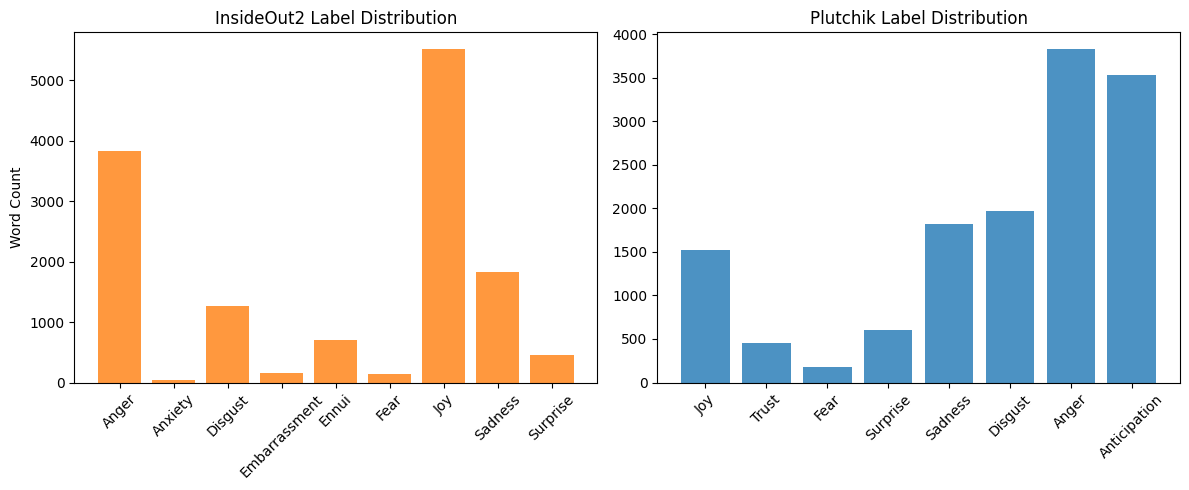

In [76]:
# bar plot 시각화 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# InsideOut2 분포
axes[0].bar(inside_counts.index, inside_counts.values, color='C1', alpha=0.8)
axes[0].set_title("InsideOut2 Label Distribution")
axes[0].set_ylabel("Word Count")
axes[0].tick_params(axis='x', rotation=45)

# Plutchik 분포 (비교용)
axes[1].bar(plutchik_counts.index, plutchik_counts.values, color='C0', alpha=0.8)
axes[1].set_title("Plutchik Label Distribution")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 2.2

In [81]:
from sklearn.metrics.pairwise import euclidean_distances

In [86]:
# 데이터 로드
df = pd.read_csv(r'C:\Users\wooll\OneDrive\문서\GitHub\-\dataset\BRM-emot-submit.csv', index_col=0)

In [87]:
# 전체 집단 V-A-D 평균만 추출
df = df[["Word","V.Mean.Sum","A.Mean.Sum","D.Mean.Sum"]]

# 컬럼명 보기 편하게 변경
df.columns = ["Word","Valence","Arousal","Dominance"]

df = df.set_index("Word")

In [88]:
# InsideOut2 9감정별 대표 단어(prototype) 정의
prototypes = {
    'Joy': 'joy',
    'Sadness': 'sadness',
    'Anger': 'anger',
    'Disgust': 'disgust',
    'Fear': 'fear',
    'Anxiety': 'anxiety',
    'Envy': 'envy',
    'Embarrassment': 'embarrassment',
    'Ennui': 'ennui'
}

In [89]:
# 프로토타입 벡터 매트릭스 생성
proto_vectors = {}
for emotion, word in prototypes.items():
    if word in df.index:
        proto_vectors[emotion] = df.loc[word].values
    else:
        raise KeyError(f"Prototype '{word}' not found in VAD lexicon.")
proto_df = pd.DataFrame(proto_vectors).T  # index: emotion, columns: Valence,Arousal,Dominance

In [90]:
# 분류 함수: 유클리드 거리 계산으로 가장 가까운 prototype 할당
def classify_prototype(valence, arousal, dominance):
    vec = np.array([[valence, arousal, dominance]])
    dists = euclidean_distances(vec, proto_df.values).flatten()
    return proto_df.index[np.argmin(dists)]

In [91]:
# 전체 단어 분류 적용
vad_reset = df.reset_index().rename(columns={'index': 'Word'})
vad_reset['InsideOut2'] = vad_reset.apply(
    lambda row: classify_prototype(row['Valence'], row['Arousal'], row['Dominance']),
    axis=1
)

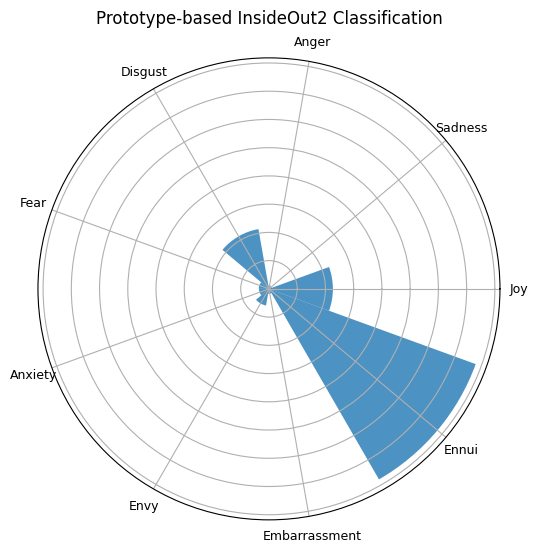

: 

In [ ]:
# 분포 집계 및 폴라 바 차트 시각화
counts = vad_reset['InsideOut2'].value_counts().reindex(proto_df.index, fill_value=0)

angles = np.linspace(0, 2 * np.pi, len(proto_df), endpoint=False)
width = 2 * np.pi / len(proto_df)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.bar(angles, counts.values, width=width, bottom=0.0, alpha=0.8)
ax.set_xticks(angles)
ax.set_xticklabels(proto_df.index, fontsize=9)
ax.set_yticklabels([])
ax.set_title("Prototype-based InsideOut2 Classification", va='bottom')
plt.show()